<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Assignment- EDA for Regression Project</h1>
</div>

© Copyright Machine Learning Plus

Content:
- Setup Environment
- Data Overview
- Univariate Analysis
- Data Preprocessing
- Bivariate Analysis 
    - Significance Tests
- EDA 
    - Get business insights

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Setup Environment</h2>
</div>

- Install the required packages 
- Import all the packages in 1st cell itself
- Set the options for data visualizations

In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from   scipy.stats import chi2_contingency
import statsmodels.api as sm
from   statsmodels.stats.anova import anova_lm
from   statsmodels.formula.api import ols
from   math import log, e

import warnings


# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Data Overview</h2>
</div>

The goal of this section is to :
- Load the data
- Shape of the data
- Explore the features

Load the data using `pd.read_csv()`. 

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

#### Shape of dataframe

In [4]:
# Shape of dataframe
df.shape

(2938, 22)

### Data Description

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors.

Columns Description:
- Country - Country
- Year - Year

- Status - Developed or Developing status

- Life expectancy - Life Expectancy in age

- Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

- infant deaths - Number of Infant Deaths per 1000 population

- Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

- percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

- Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

- Measles - Measles - number of reported cases per 1000 population

- BMI - Average Body Mass Index of entire population

- under-five deaths - Number of under-five deaths per 1000 population

- Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)

- Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)

- Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

- HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)

- GDP - Gross Domestic Product per capita (in USD)

- Population - Population of the country

- thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

- thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)

- Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

- Schooling - Number of years of Schooling(years)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Univariate Analysis</h2>
</div>

The goal of this section is to:
- Get the summary of data - mean, std, count, quartiles and range
- Get additonal univariate stats of data
    - Missing Values
    - Unique Values
    - Data Type
- Check the distribution of target variable

### Q3.1. Get the summary of data - mean, std, count, quartiles and range

In [5]:
# Summary of dataframe
df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

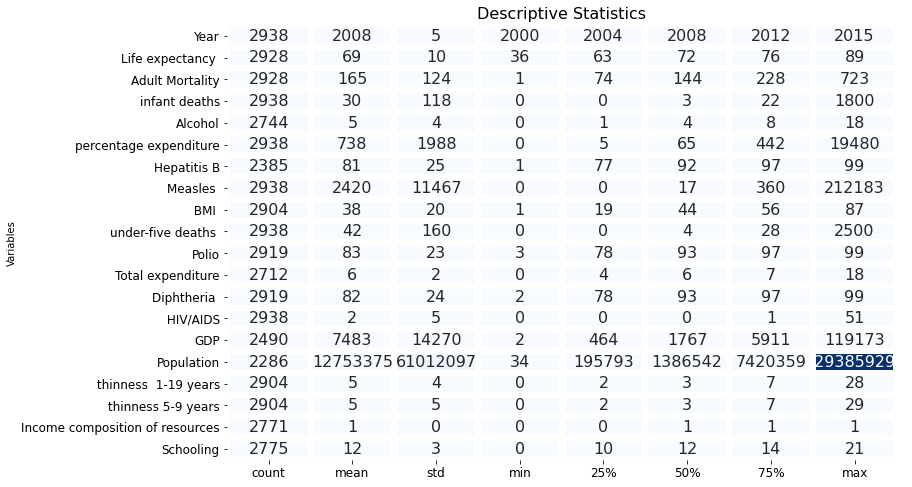

In [6]:
# Let's look at the summary statistic visually
plt.figure(figsize = (12,8))
sns.heatmap(df.describe().T, annot=True,cmap = "Blues", fmt= '.0f',
            linewidths = 5, cbar = False,
            annot_kws={"size": 16})

plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

### Q3.2. Get additonal univariate stats of data
- Missing Values
- Unique Values
- Data Type

In [7]:
# Stats of dataframe
stats    = []
for col in df.columns:
    stats.append((col, df[col].dtype, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0]))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'type', 'Unique_values', 'Percentage of missing values'])
stats_df.sort_values('Percentage of missing values', ascending=False)

Feature     type  Unique_values  \
17                       Population  float64           2278   
8                       Hepatitis B  float64             87   
16                              GDP  float64           2490   
13                Total expenditure  float64            818   
6                           Alcohol  float64           1076   
20  Income composition of resources  float64            625   
21                        Schooling  float64            173   
19               thinness 5-9 years  float64            207   
18             thinness  1-19 years  float64            200   
10                             BMI   float64            608   
12                            Polio  float64             73   
14                      Diphtheria   float64             81   
3                  Life expectancy   float64            362   
4                   Adult Mortality  float64            425   
15                         HIV/AIDS  float64            200   
0                           Country   object            193   
1                              Year    int64             16   
9                          Measles     int64            958   
7            percentage expenditure  float64           2328   
5                     infant deaths    int64            209   
2                            Status   object              2   
11               under-five deaths     int64            252   

    Percentage of missing values  
17                     22.191967  
8                      18.822328  
16                     15.248468  
13                      7.692308  
6                       6.603131  
20                      5.684139  
21                      5.547992  
19                      1.157250  
18                      1.157250  
10                      1.157250  
12                      0.646698  
14                      0.646698  
3                       0.340368  
4                       0.340368  
15                      0.000000  
0                       0.000000  
1                       0.000000  
9                       0.000000  
7                       0.000000  
5                       0.000000  
2                       0.000000  
11                      0.000000

### Q3.3. Check the distribution of target variable

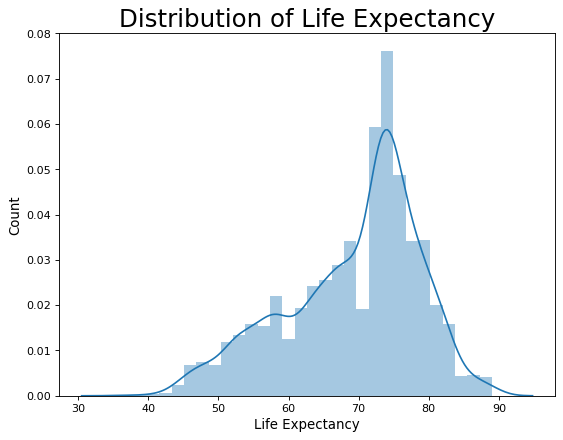

In [8]:
# Plot distplot
plt.figure(figsize = (8,6), dpi= 80)
sns.distplot(df['Life expectancy '], label='Life Expectancy', hist = True)

# Decoration
plt.title("Distribution of " + 'Life Expectancy', fontsize=22)
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Let's draw the boxplot

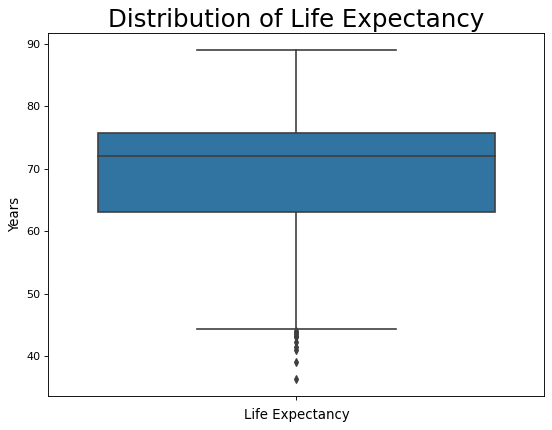

In [11]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(y='Life expectancy ', data=df, notch=False)

# Decoration
plt.title("Distribution of " + 'Life Expectancy', fontsize=22)
plt.ylabel('Years', fontsize = 12)
plt.xlabel('Life Expectancy', fontsize = 12)

plt.show()

### Q3.4. Get insights from the section

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>


Lot of interesting things can be observed here:
- The data has missing values
- Datatype of Year columns lis int, rather it should be object
- All the columns have atleast 2 unique values, hence all the columns have variance
- The target variable is almost linearly distributed with only a few outliers
- The target variable has missing values

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preprocessing</h2>
</div>

The goal of this section is to:
- Remove the extra spaces in the column names
- Treat the missing values

### Q4.1. Check if there are extra spaces in the column names. If yes, remove the extra spaces in the column names

In [12]:
# Create list of numeric and categorical columns and check if they have extra spaces in the column names
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


Few columns like Life expectancy, Measles etc. are having extra spaces in their column names. These needs to be removed

In [13]:
# Remove the extra space from column names
df = df.rename(columns=lambda x: x.strip())

# replace extra space with _
df.columns = df.columns.str.replace(' ', '_')

Get list of new column names for further operations

In [14]:
# Create list of numeric and categorical columns
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exYearclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


### 4.2. Treat the missing values is the data
- Drop the rows with missing values in the target variable
- Replace the missing values with mean in other variables

In [15]:
df.dropna(subset=['Life_expectancy'], inplace = True)

In [16]:
# Replace na values by mean of the values in column
for i in df.columns.drop(['Country','Status']):             
    df[i].fillna(df[i].mean(), inplace = True)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Bivariate Analysis - Statistical Significance Tests</h2>
</div>

The goal of this section is to:
- Check the statistical significance of categorical variables with target variable using ANOVA test
- Check the statistical significance of numerical variables with target variable using correlation test

### Q5.1. Check the statistical significance of categorical variables with target class using ANOVA test

In [17]:
# Create list of numeric and categorical columns
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


In [18]:
# Numeric Columns
num_cols = num_col.to_list()
num_cols.remove('Year')
num_cols

['Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under-five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

In [31]:
# Categorical Columns
cat_cols = cat_col.to_list()
cat_cols.append('Year')
cat_cols

['Country', 'Status', 'Year']

In [32]:
df.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0             62     0.01               71.279624         65.0     1154  19.1   
1             64     0.01               73.523582         62.0      492  18.6   
2             66     0.01               73.219243         64.0      430  18.1   
3             69     0.01               78.184215         67.0     2787  17.6   
4             71     0.01                7.097109         68.0     3013  17.2   

   under-five_deaths  Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
0                 83    6.0               8.16        65.0       0.1   
1                 86   58.0               8.18        62.0       0.1   
2                 89   62.0               8.13        64.0       0.1   
3                 93   67.0               8.52        67.0       0.1   
4                 97   68.0               7.87        68.0       0.1   

          GDP  Population  thinness__1-19_years  thinness_5-9_years  \
0  584.259210  33736494.0                  17.2                17.3   
1  612.696514    327582.0                  17.5                17.5   
2  631.744976  31731688.0                  17.7                17.7   
3  669.959000   3696958.0                  17.9                18.0   
4   63.537231   2978599.0                  18.2                18.2   

   Income_composition_of_resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

3 columns are actually categorical, while they are stated as numerical. So you need to treat these manually

#### ANOVA with statsmodels api

Fit ANOVA model

In [23]:
col = 'Schooling'
model = ols('Life_expectancy ~ C(' + col + ')', df).fit()
print(f"Overall model F({model.df_model: .0f}, {model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# ANOVA table
res = sm.stats.anova_lm(model, typ=2)
res

Overall model F( 173,  2754) =  24.391, p =  0.0000


sum_sq      df          F  PR(>F)
C(Schooling)  160643.441037   173.0  24.390657     0.0
Residual      104847.318950  2754.0        NaN     NaN

In [24]:
model.f_pvalue

0.0

As the p value is less than the significance level, you can reject the H0. The two groups are different. 

In [25]:
# significance value
alpha = 0.05

significant_categorical_variables = []
for col in cat_cols:
    model = ols('Life_expectancy ~ C(' + col + ')', df).fit()
    
    # Determine whether to reject or keep null hypothesis
    print(col.ljust(50), ',   F-statistic=%.5f, p=%.5f' % (model.fvalue, model.f_pvalue))
    if model.f_pvalue <= alpha:
        significant_categorical_variables.append(col)

Country                                            ,   F-statistic=187.70981, p=0.00000
Status                                             ,   F-statistic=886.15556, p=0.00000
Year                                               ,   F-statistic=5.83750, p=0.00000


In [26]:
# See Significant variables
print(significant_categorical_variables)

['Country', 'Status', 'Year']


'Country', 'Status' and 'Year' columns are significantly affecting the target variable

### Q5.2. Check the statistical significance of numerical variables with target variable using correlation test

Check the statistical significance of all the numeric columns with the target column

In [27]:
from scipy.stats import pearsonr

In [28]:
# calculate Pearson's correlation

col = 'Adult_Mortality'
corr, _ = pearsonr(df[col].astype(float), df['Life_expectancy'])
print('Pearsons correlation: %.3f' % corr)
print('p-value: ', _)

Pearsons correlation: -0.696
p-value:  0.0


In [29]:
# significance value
alpha = 0.05

significant_numerical_variables = []
for col in num_cols:
    corr, _ = pearsonr(df[col].astype(float), df['Life_expectancy'])
    
    # Determine whether to reject or keep null hypothesis
    print(col.ljust(50), ',   Pearson Correlation=%.5f, p=%.5f' % (corr, _))
    if _ <= alpha:
        significant_numerical_variables.append(col)

Life_expectancy                                    ,   Pearson Correlation=1.00000, p=0.00000
Adult_Mortality                                    ,   Pearson Correlation=-0.69636, p=0.00000
infant_deaths                                      ,   Pearson Correlation=-0.19656, p=0.00000
Alcohol                                            ,   Pearson Correlation=0.39242, p=0.00000
percentage_expenditure                             ,   Pearson Correlation=0.38186, p=0.00000
Hepatitis_B                                        ,   Pearson Correlation=0.20457, p=0.00000
Measles                                            ,   Pearson Correlation=-0.15759, p=0.00000
BMI                                                ,   Pearson Correlation=0.56245, p=0.00000
under-five_deaths                                  ,   Pearson Correlation=-0.22253, p=0.00000
Polio                                              ,   Pearson Correlation=0.46259, p=0.00000
Total_expenditure                                  ,   P

In [30]:
# See Significant variables
print(significant_numerical_variables)

['Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness__1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


All the numerical columns except 'Population' column are significantly affecting the target variable

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Exploratory Data Analysis</h2>
</div>

Exploratory data analysis is an approach to analyze data sets to find out patterns, insights and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarize the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.



The goal of this section is to:
- Check for multicollinearity 
- Check the Distribution of Categorical variables
- Check the Distribution of Numerical variables
- Draw pairplot to look at all the variables at once

In [33]:
# Numeric Columns
num_cols.remove('Life_expectancy')

In [34]:
num_cols

['Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under-five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

### Q6.1. Check for multicollinearity in the columns 
- Compute the correlation matrix 
- Plot it using heatmap

In [35]:
# Correlation Matrix
df.corr()

Year  Life_expectancy  Adult_Mortality  \
Year                             1.000000         0.170033        -0.079052   
Life_expectancy                  0.170033         1.000000        -0.696359   
Adult_Mortality                 -0.079052        -0.696359         1.000000   
infant_deaths                   -0.036464        -0.196557         0.078756   
Alcohol                         -0.044669         0.392420        -0.190791   
percentage_expenditure           0.032723         0.381864        -0.242860   
Hepatitis_B                      0.090739         0.204566        -0.139146   
Measles                         -0.081840        -0.157586         0.031176   
BMI                              0.104094         0.562453        -0.383641   
under-five_deaths               -0.041980        -0.222529         0.094146   
Polio                            0.094158         0.462592        -0.273295   
Total_expenditure                0.078679         0.209628        -0.111772   
Diphtheria                       0.134333         0.476442        -0.273602   
HIV/AIDS                        -0.138789        -0.556556         0.523821   
GDP                              0.094443         0.430551        -0.277081   
Population                       0.015180        -0.019629        -0.012509   
thinness__1-19_years            -0.044835        -0.472778         0.300262   
thinness_5-9_years              -0.047888        -0.467231         0.305767   
Income_composition_of_resources  0.236222         0.692621        -0.440154   
Schooling                        0.207357         0.718614        -0.437255   

                                 infant_deaths   Alcohol  \
Year                                 -0.036464 -0.044669   
Life_expectancy                      -0.196557  0.392420   
Adult_Mortality                       0.078756 -0.190791   
infant_deaths                         1.000000 -0.114806   
Alcohol                              -0.114806  1.000000   
percentage_expenditure               -0.085906  0.339454   
Hepatitis_B                          -0.179724  0.074245   
Measles                               0.501038 -0.051786   
BMI                                  -0.227427  0.325939   
under-five_deaths                     0.996628 -0.111781   
Polio                                -0.171049  0.214038   
Total_expenditure                    -0.126769  0.300901   
Diphtheria                           -0.175524  0.215578   
HIV/AIDS                              0.024955 -0.049719   
GDP                                  -0.107327  0.318622   
Population                            0.548547 -0.030934   
thinness__1-19_years                  0.465590 -0.420607   
thinness_5-9_years                    0.471229 -0.409477   
Income_composition_of_resources      -0.143554  0.417014   
Schooling                            -0.193232  0.498167   

                                 percentage_expenditure  Hepatitis_B  \
Year                                           0.032723     0.090739   
Life_expectancy                                0.381864     0.204566   
Adult_Mortality                               -0.242860    -0.139146   
infant_deaths                                 -0.085906    -0.179724   
Alcohol                                        0.339454     0.074245   
percentage_expenditure                         1.000000     0.011988   
Hepatitis_B                                    0.011988     1.000000   
Measles                                       -0.056831    -0.090827   
BMI                                            0.230976     0.139102   
under-five_deaths                             -0.088152    -0.185377   
Polio                                          0.147608     0.406308   
Total_expenditure                              0.175222     0.060839   
Diphtheria                                     0.143967     0.498359   
HIV/AIDS                                      -0.098230    -0.103061   
GDP                                 

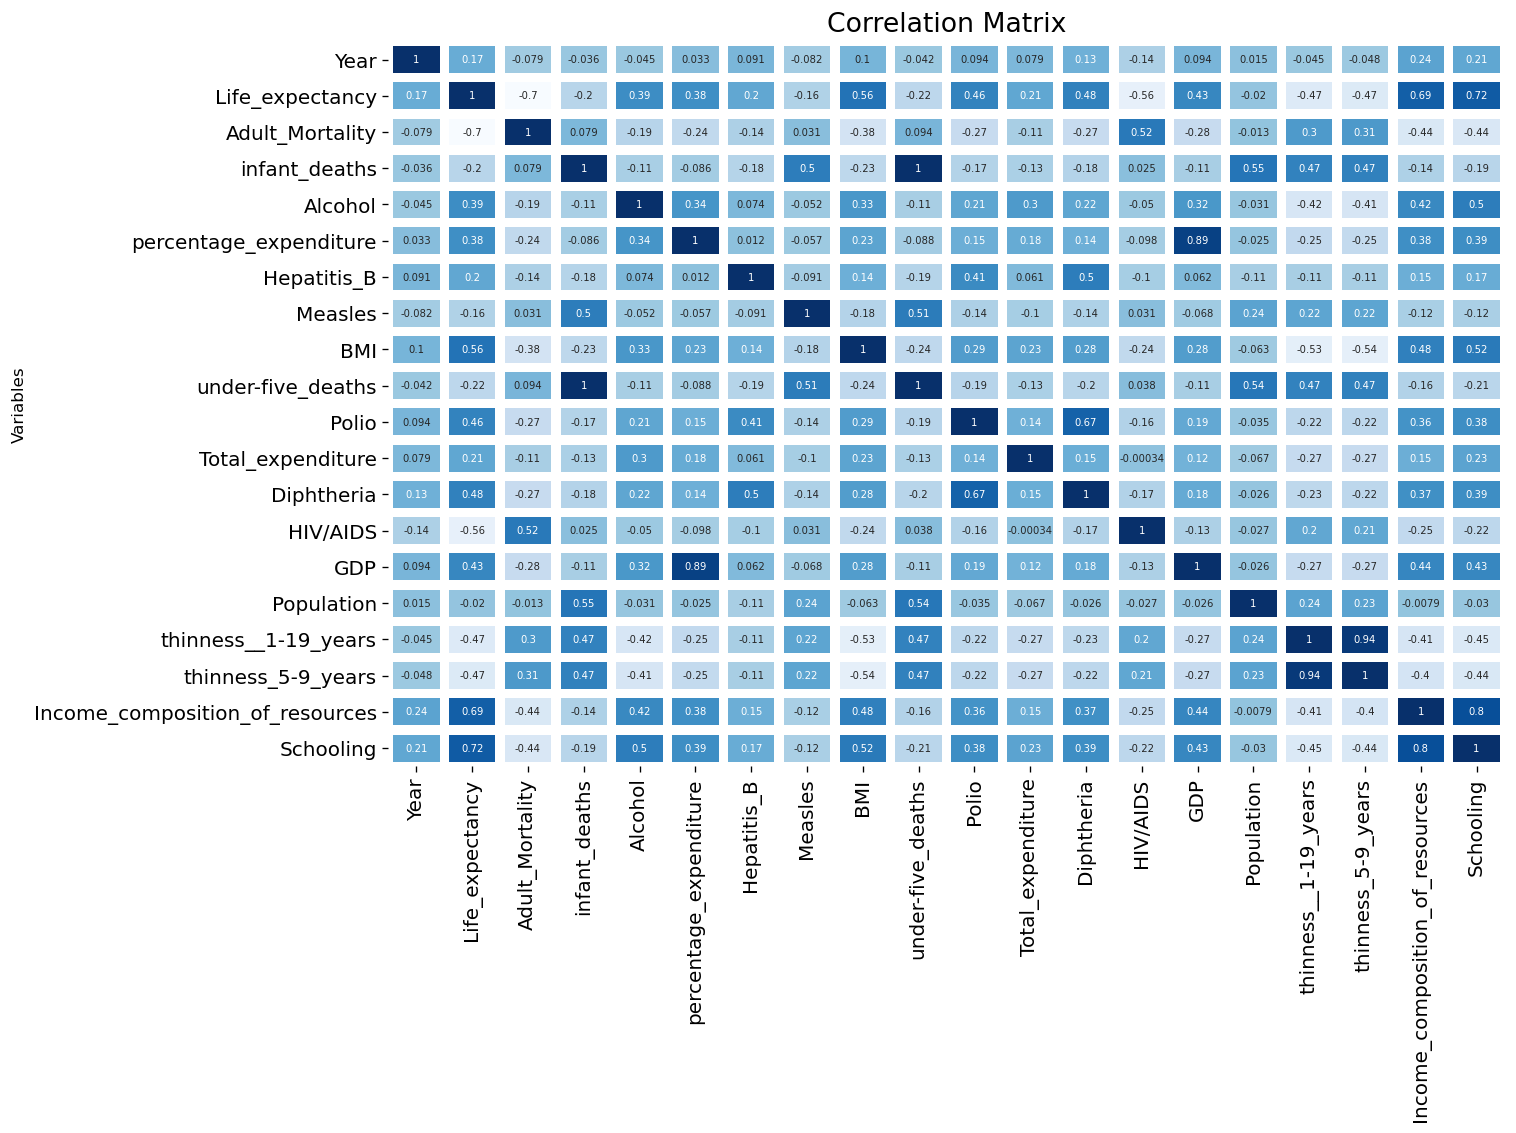

In [36]:
# Let's look at the correlation matrix visually
plt.figure(figsize = (12,8), dpi = 120)
sns.heatmap(df.corr(), annot=True,cmap = "Blues",
            linewidths = 5, cbar = False,
            annot_kws={"size": 6})

plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Correlation Matrix", size = 16)
plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Few x variables are correlated to each other like GDP and Percentage Expenditure, thinness 1-19 years and thinness 5-9 years, income composition and schooling etc
- Infant deaths ad under five deaths are perfectly correlated. they are conveying the same information
- If you go ahead with linear regression, use only 1 column out of the columns with multicolinearity

## Analyze the effect of categorical columns on the target variable

### Q6.2 Check the distribution of Status variable and see how it affects the target variable

At first let's get the count of countries for every status

### Status

Let's start with Status. At first let's get the count of datapoints for every status

In [37]:
col = 'Status'
print(df[col].nunique())

2


Developing    2416
Developed      512
Name: Status, dtype: int64


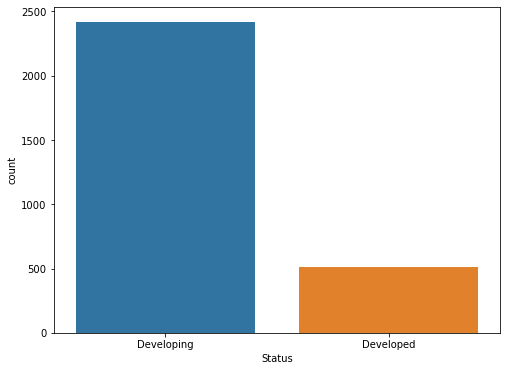

In [38]:
col = 'Status'
print(df[col].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data=df, x= col)
plt.show()

Let's understand the relationship of Status on the target variable - Life Expectancy

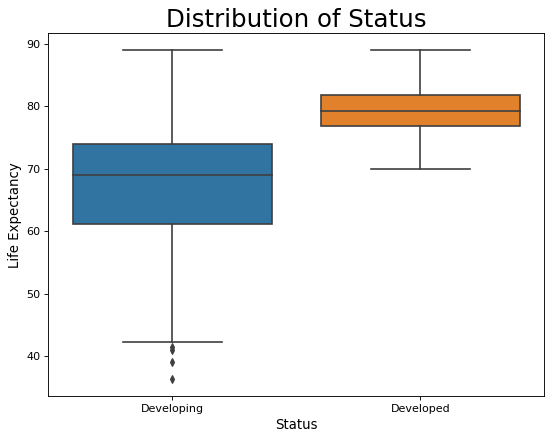

In [39]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x=col, y='Life_expectancy', data=df, notch=False)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.ylabel('Life Expectancy', fontsize = 12)
plt.xlabel(col, fontsize = 12)

plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- There are only 2 status - Developed and Developing
- Very few countries are developed as compared to developed countries
- Life expectancy of developed countries is more than developing countries

### Q6.3 Check the distribution of Country variable and see how it affects the target variable

In [40]:
col = 'Country'
print(df[col].nunique())

183


In [41]:
print(df[col].value_counts())

Malawi                                                  16
Oman                                                    16
Uruguay                                                 16
Haiti                                                   16
United Kingdom of Great Britain and Northern Ireland    16
Bolivia (Plurinational State of)                        16
Colombia                                                16
Zimbabwe                                                16
United States of America                                16
Sweden                                                  16
Gambia                                                  16
Saint Lucia                                             16
France                                                  16
Serbia                                                  16
Montenegro                                              16
Libya                                                   16
Micronesia (Federated States of)                        

There are 183 countries, each having 16 years worth of data. The count plot will also give the same information, hence not plotting it

Let's understand the relationship of Status on the target variable - Life Expectancy

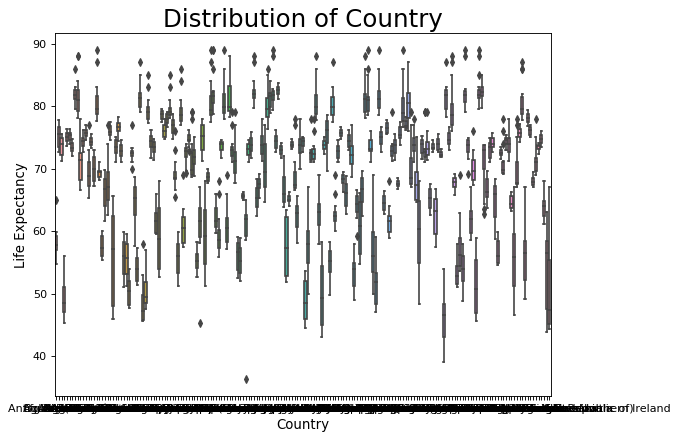

In [42]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x=col, y='Life_expectancy', data=df, notch=False)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.ylabel('Life Expectancy', fontsize = 12)
plt.xlabel(col, fontsize = 12)

plt.show()

It's difficult to analyze the life expectancy for every country in a single plot. Let's find the top and bottom 10 countries as per life expectancy

In [43]:
# Average life expectancy for every country
temp = df.groupby('Country').agg({'Life_expectancy': np.mean})
temp['Country'] = temp.index
temp.reset_index(drop = True, inplace = True)
temp.head()

Life_expectancy              Country
0         58.19375          Afghanistan
1         75.15625              Albania
2         73.61875              Algeria
3         49.01875               Angola
4         75.05625  Antigua and Barbuda

In [44]:
# top 10 countries with highest life expectancy
temp.sort_values('Life_expectancy', ascending= False).head(10)

Life_expectancy      Country
82          82.53750        Japan
156         82.51875       Sweden
73          82.44375      Iceland
157         82.33125  Switzerland
58          82.21875       France
80          82.18750        Italy
151         82.06875        Spain
7           81.81250    Australia
119         81.79375       Norway
30          81.68750       Canada

In [45]:
# 10 countries with lowest life expectancy
temp.sort_values('Life_expectancy', ascending= True).head(10)

Life_expectancy                   Country
143         46.11250              Sierra Leone
31          48.51250  Central African Republic
92          48.78125                   Lesotho
3           49.01875                    Angola
98          49.89375                    Malawi
32          50.38750                      Chad
43          50.38750             Côte d'Ivoire
182         50.48750                  Zimbabwe
155         51.32500                 Swaziland
118         51.35625                   Nigeria

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- There are only 183 Countries
- Japan has the highest life expectancy of 82.53750 years
- Sierra Leone has the lowest life expectancy of 46.112 years

### Q6.4. Check the distribution of Year variable and see how it affects the target variable

In [46]:
col = 'Year'
print(df[col].nunique())

16


2000    183
2002    183
2004    183
2006    183
2008    183
2010    183
2012    183
2014    183
2001    183
2003    183
2005    183
2007    183
2009    183
2011    183
2013    183
2015    183
Name: Year, dtype: int64


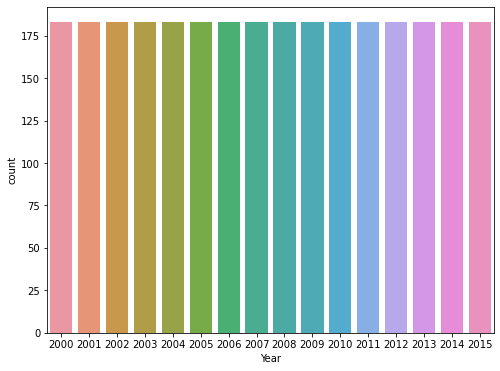

In [47]:
print(df[col].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data=df, x= col)
plt.show()

Let's understand the relationship of Year on the target variable - Life Expectancy

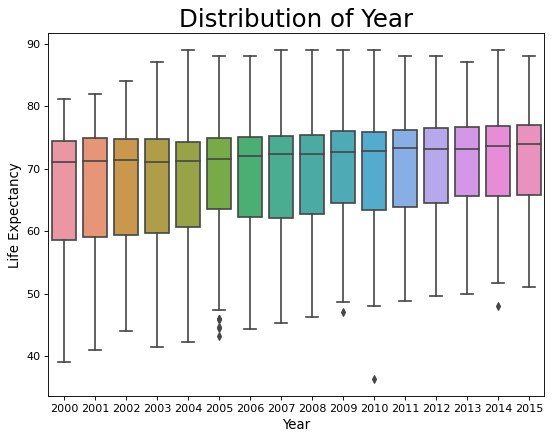

In [48]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x=col, y='Life_expectancy', data=df, notch=False)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.ylabel('Life Expectancy', fontsize = 12)
plt.xlabel(col, fontsize = 12)

plt.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- We have 16 years worth of data starting from 2000 to 2015
- The median life expectancy is almost same for all the years, however the minimum life expectancy has been increasing over the years

## Analyze the effect of numerical columns on the target variable

### Q6.5. Check the distribution of Adult Mortality variable and see how it affects the target variable

In [49]:
col = 'Adult_Mortality'

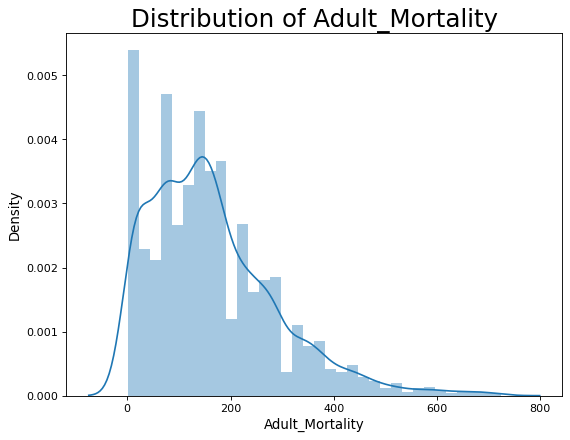

In [50]:
# Plot distplot
plt.figure(figsize = (8,6), dpi= 80)
sns.distplot(df[col], label=col, hist = True)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.xlabel(col, fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Let's draw the boxplot

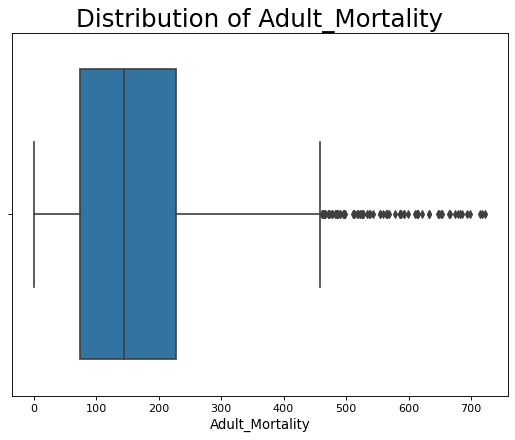

In [51]:
# Plot Boxplot
plt.figure(figsize=(8,6), dpi= 80)
sns.boxplot(x=col, data=df, notch=False)

# Decoration
plt.title("Distribution of " + col, fontsize=22)
plt.xlabel(col, fontsize = 12)

plt.show()

Let's check the correlation with target variable

In [52]:
# Correlation
corr, _ = pearsonr(df[col].astype(float), df['Life_expectancy'])
corr

-0.696359313769976

Let's draw scatterplot to undertand the relationship

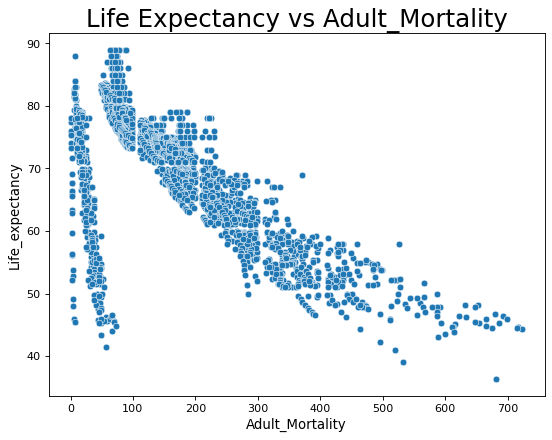

In [53]:
# Plot Scatterplot
plt.figure(figsize=(8,6), dpi= 80)
sns.scatterplot(x=col, y='Life_expectancy', data=df)

# Decoration
plt.title("Life Expectancy vs " + col, fontsize=22)
plt.xlabel(col, fontsize = 12)
plt.ylabel('Life_expectancy', fontsize = 12)

plt.show()

Looks like there are two pattern in the data, might be because of the status of the country. Let's check it out

In [54]:
categories = df['Status'].unique()
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
categories

array(['Developing', 'Developed'], dtype=object)

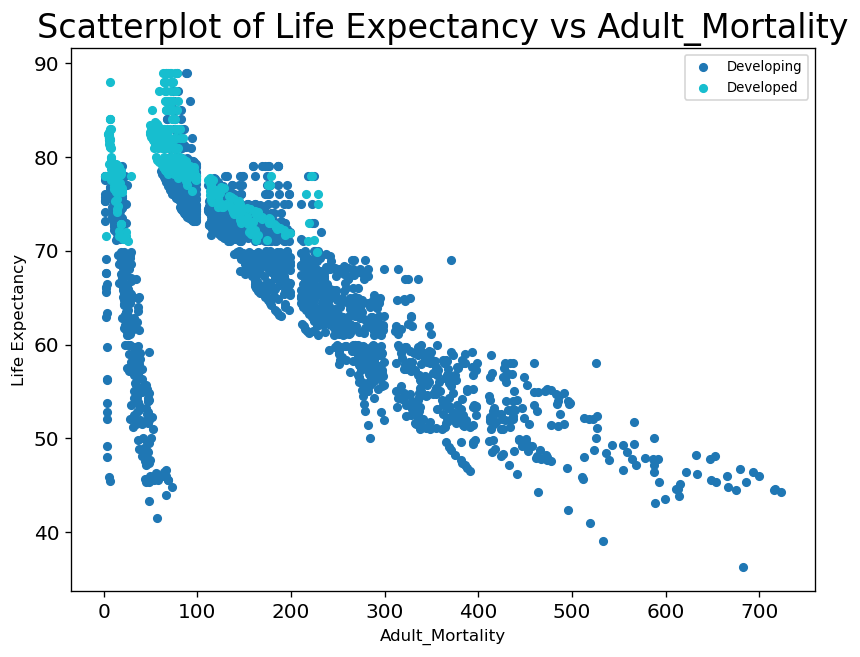

In [55]:
# Draw Plot for Each Category
fig, axes = plt.subplots(1,1, figsize=(8,6), dpi=120)

for i, category in enumerate(categories):
    df.loc[df.Status==category, :].plot(x=col, 
            y='Life_expectancy', 
            kind='scatter', 
            ax=axes,
            s=20, 
            color=colors[i], 
            label=str(category))
    
    
# Decorations based on axes
plt.gca().set(xlabel=col, ylabel='Life Expectancy')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Life Expectancy vs " + col, fontsize=20)
plt.legend(fontsize=8)    
plt.show()   

These two patterns are not due to status of the country as the points of developing and developed countries are scattered in both the patterns. Let's look at other variables as well.

Let's create a function to get all these plots and information. So that it can be reused.

In [56]:
def num_analysis(df, col):
    
    # Plot distplot
    plt.figure(figsize = (10,8), dpi= 80)
    sns.distplot(df[col], label=col, hist = True)
    plt.title("Distribution of " + col, fontsize=20)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()
    
    # Plot Boxplot
    plt.figure(figsize=(10,8), dpi= 80)
    sns.boxplot(x=col, data=df, notch=False)
    plt.title("Distribution of " + col, fontsize=20)
    plt.xlabel(col, fontsize = 12)
    plt.show()
    
    # Status Categories
    categories = df['Status'].unique()
    colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
    
    # Correlation
    corr, _ = pearsonr(df[col].astype(float), df['Life_expectancy'])
    corr = np.round(corr, 2)
    
    # Draw Plot for Each Category
    fig, axes = plt.subplots(1,1, figsize=(10,8), dpi=80)
    for i, category in enumerate(categories):
        df.loc[df.Status==category, :].plot(x=col, 
                y='Life_expectancy', 
                kind='scatter', 
                ax=axes,
                s=20, 
                color=colors[i], 
                label=str(category))
    plt.gca().set(xlabel=col, ylabel='Life Expectancy')
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title("Life Expectancy vs " + col + " (Corr : " + str(corr) + ")", fontsize=20)
    plt.legend(fontsize=8)    
    plt.show()  

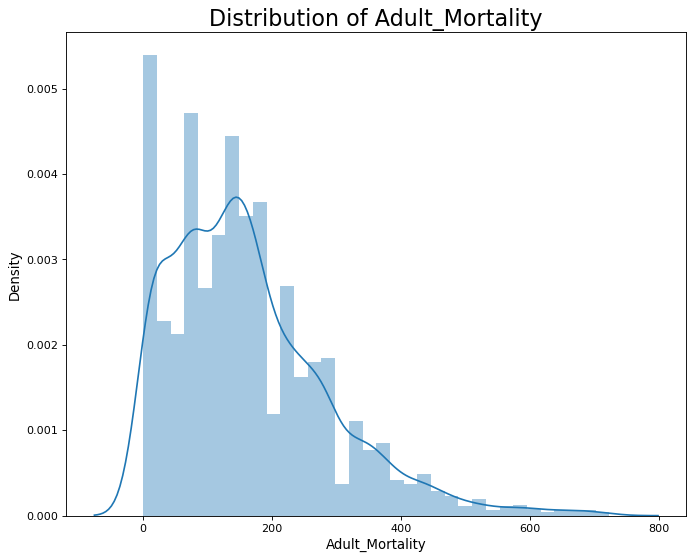

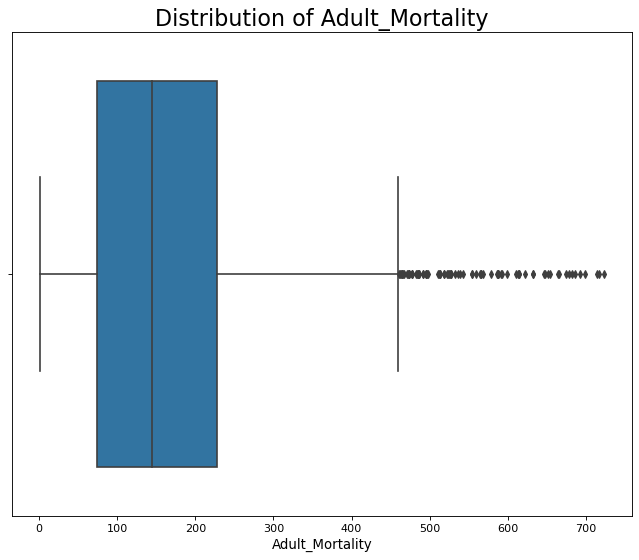

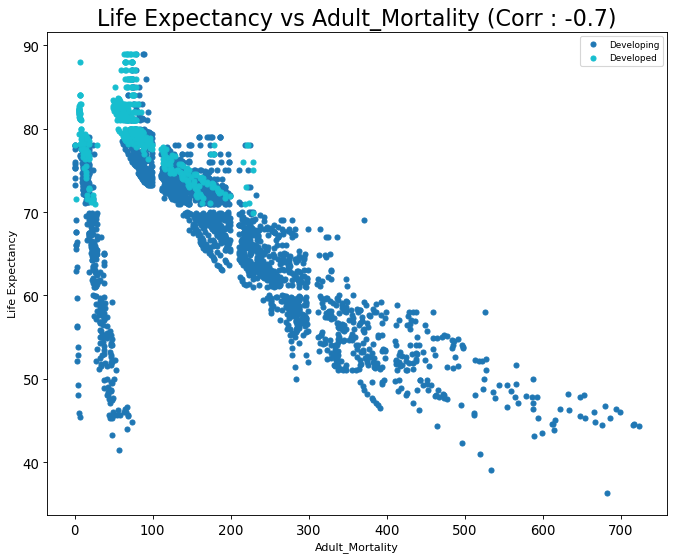

In [57]:
num_analysis(df, 'Adult_Mortality')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Adult Mortality rate is almost linearly distributed with few outliers
- Life Expectancy has a negative correlation with Adult Mortality Rate with correlation coeffecient -0.7
- Two patterns can be observed for life expectanncy vs adult mortality rate

### Q6.6. Check the distribution of Thinness 5-9 years variable and see how it affects the target variable

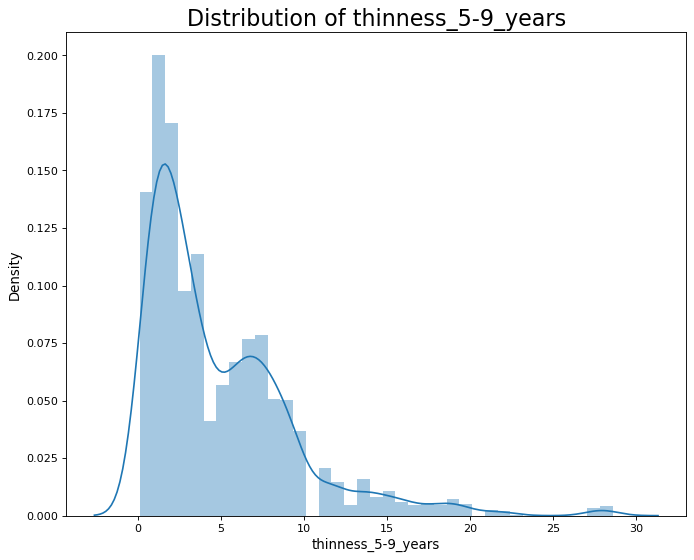

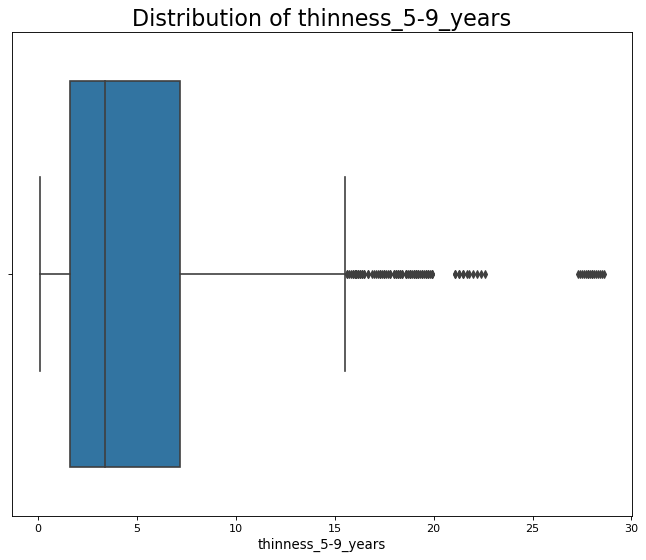

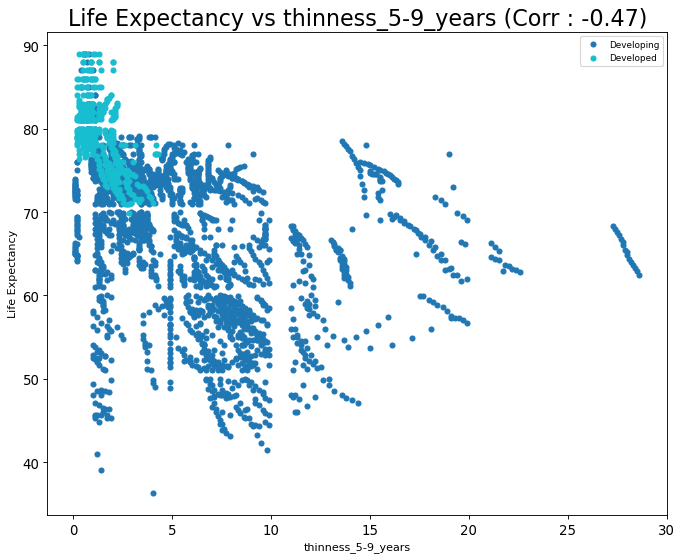

In [58]:
num_analysis(df, 'thinness_5-9_years')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Thinness 5-9 years is right skewed with few outliers
- Life Expectancy has a negative correlation with thinness with correlation coeffecient -0.47
- Developed nations have very less thinness, even less than 5

### Q6.7. Check the distribution of Income compostition of Resources variable and see how it affects the target variable

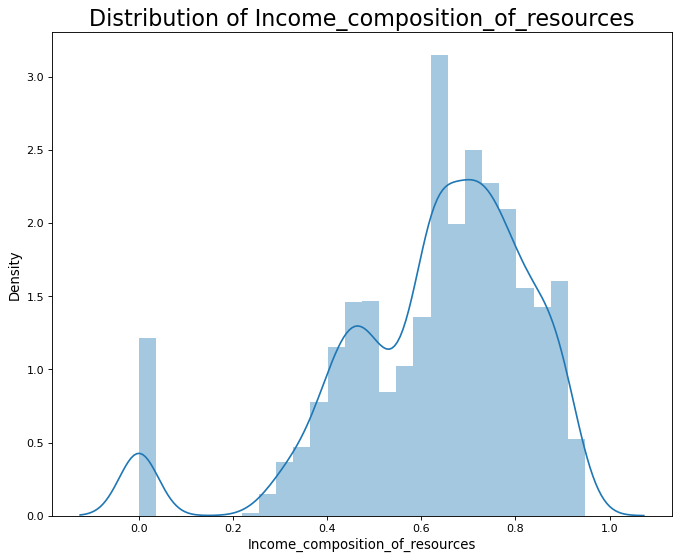

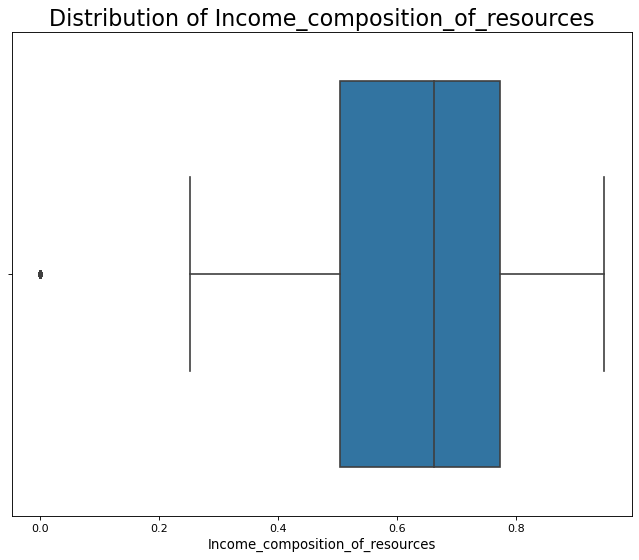

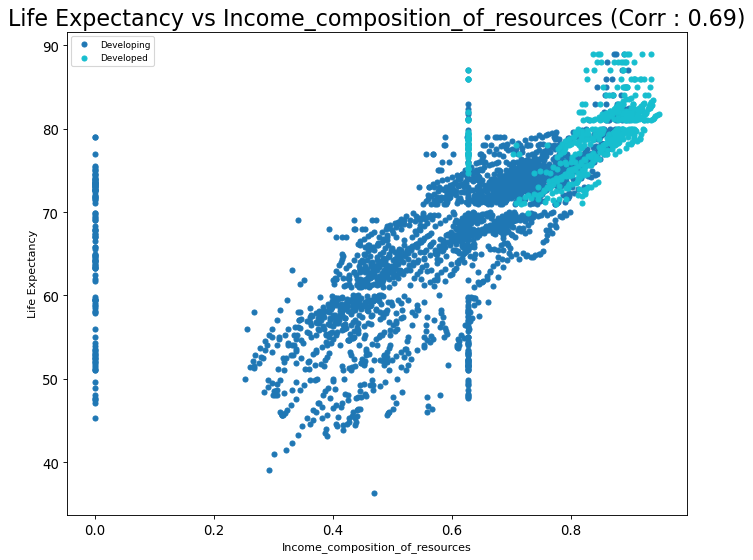

In [59]:
num_analysis(df, 'Income_composition_of_resources')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Income composition of resources is almost linearly distributed with few outliers close to zero
- Life Expectancy has a strong positive correlation with Income composition with correlation coeffecient 0.69
- Developed nations have more income composition of resources

### Q6.8. Check the distribution of Alcohol variable and see how it affects the target variable

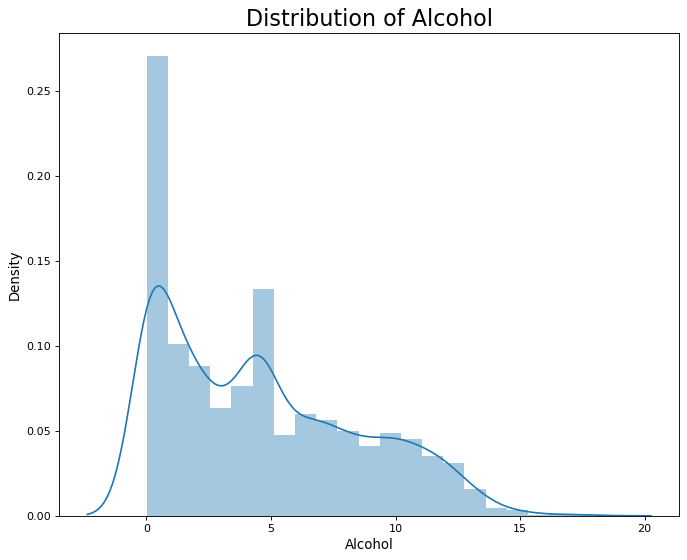

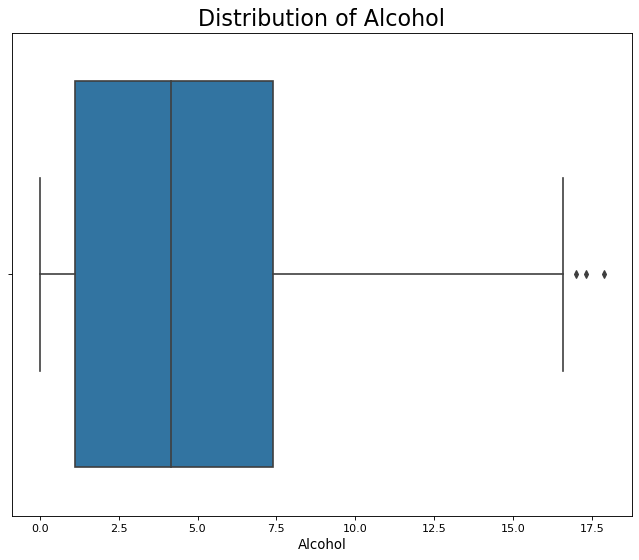

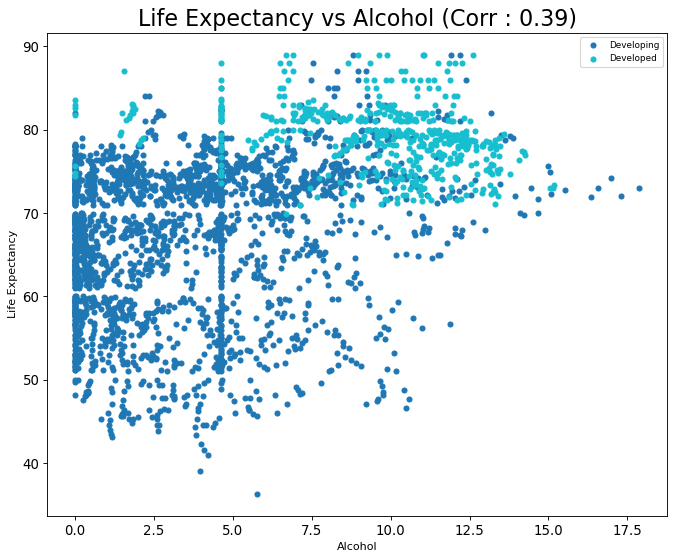

In [60]:
num_analysis(df, 'Alcohol')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Most of the datapoints in Alochol column have 0 density
- Surprisingly Life Expectancy has a positive correlation with Alcohol consuption with correlation coeffeciennt 0.39

### Q6.9. Check the distribution of Percentage Expenditure variable and see how it affects the target variable

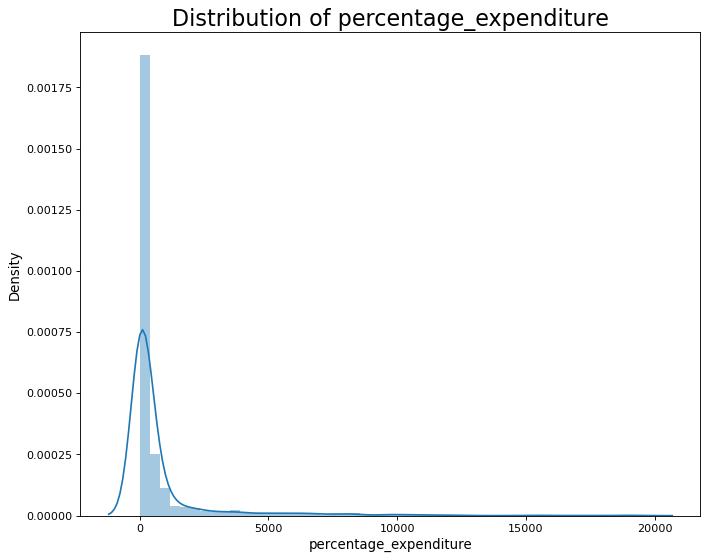

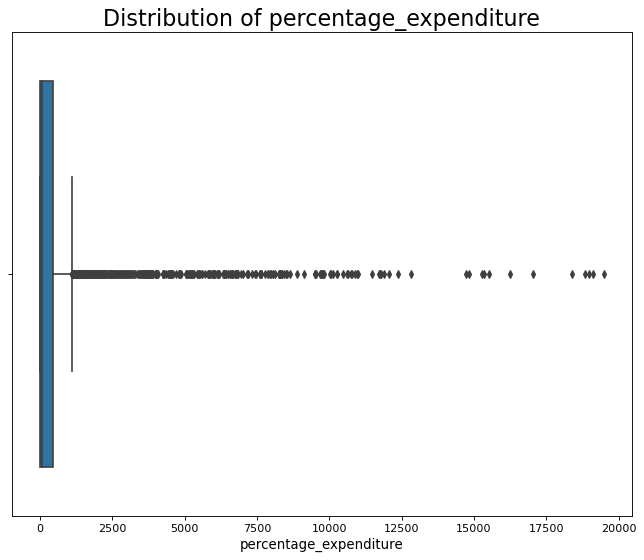

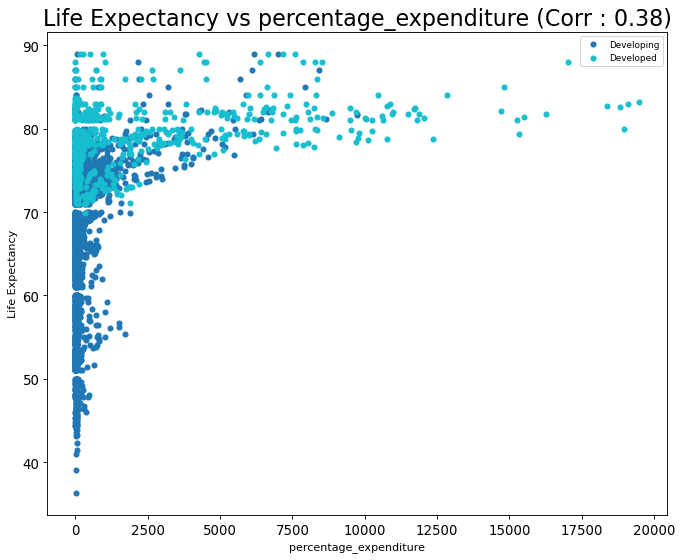

In [61]:
num_analysis(df, 'percentage_expenditure')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Percentage Expenditure has lot of outliers, most of the outliers are from developed countries
- Life Expectancy has a positive correlation with Percentage Expenditure with correlation coeffecient -0.38

### Q6.10. Check the distribution of Hepatitis B variable and see how it affects the target variable

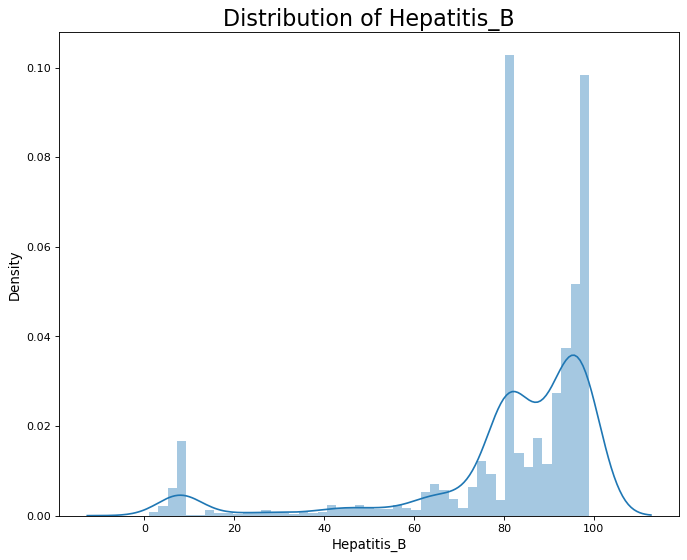

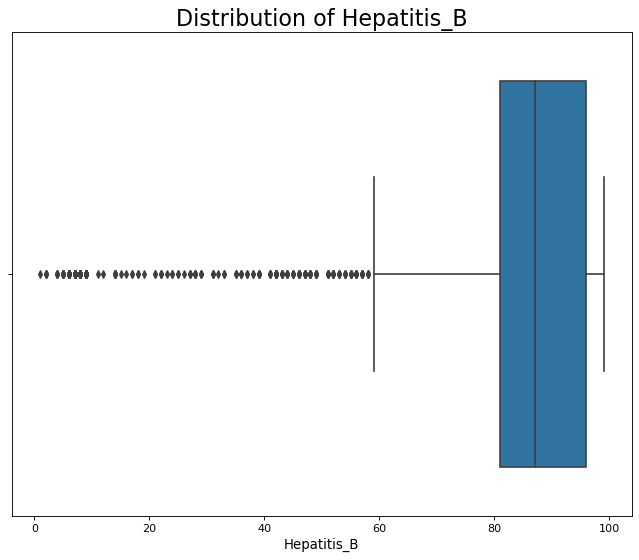

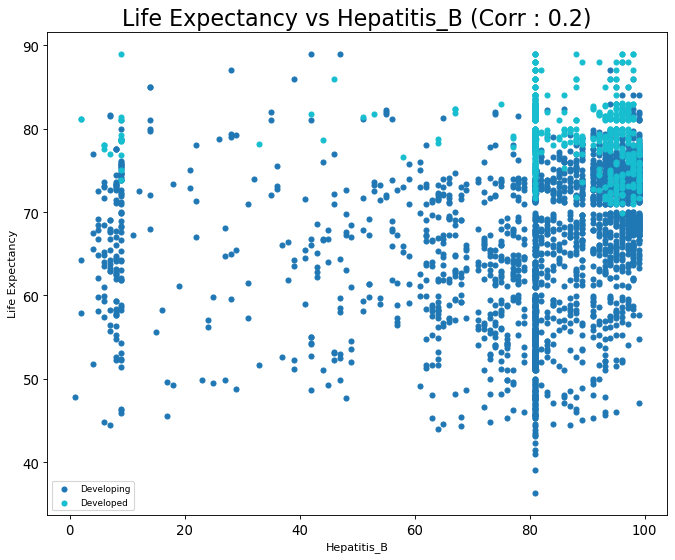

In [62]:
num_analysis(df, 'Hepatitis_B')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Hepatitis_B vaccination is left skewed and has lots of outliers towards 0
- Life Expectancy has a weak positive correlation with Hepatitis_B with correlation coeffecient 0.2
- Most of the developed nations have Hepatitis_B vaccination rate more than 80

### Q6.11. Check the distribution of GDP variable and see how it affects the target variable

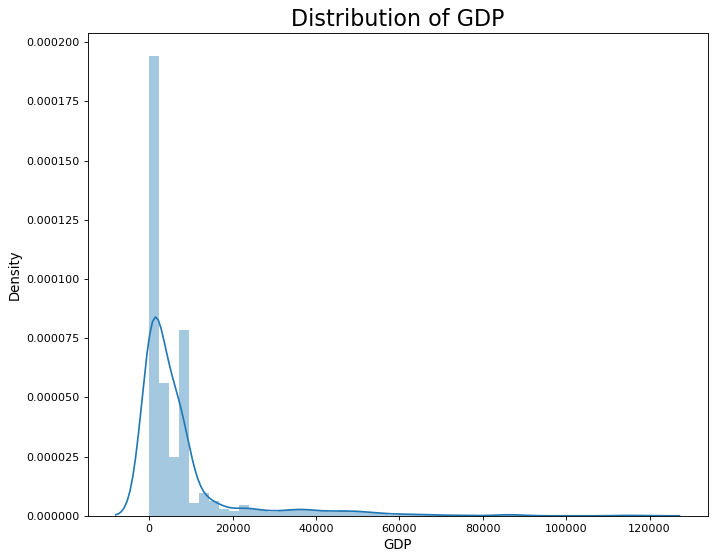

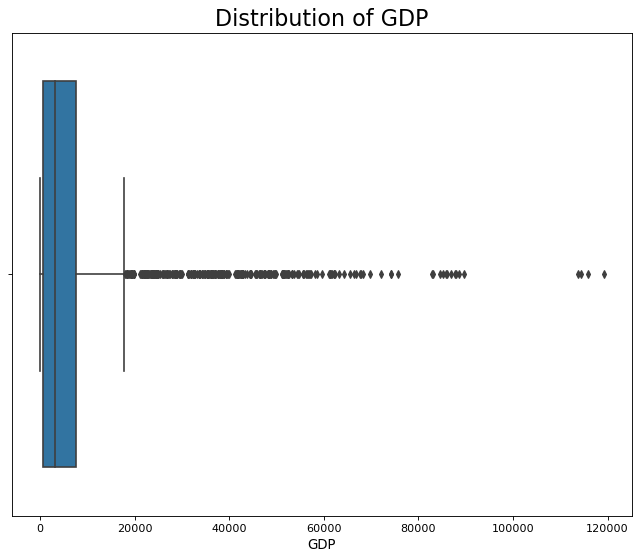

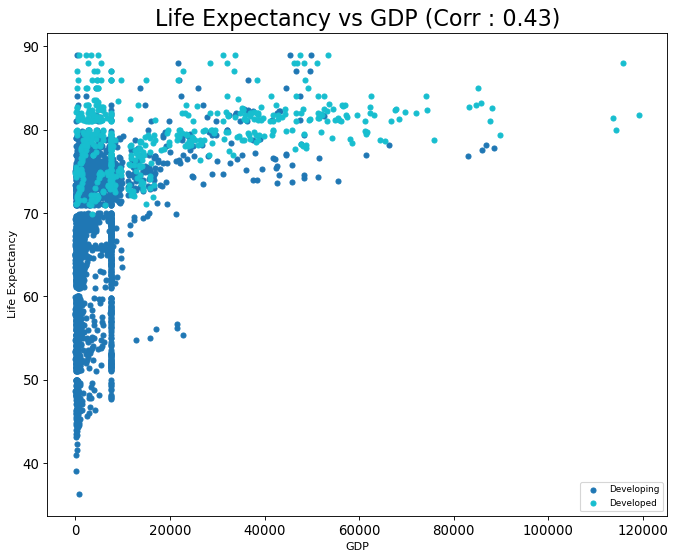

In [63]:
num_analysis(df, 'GDP')

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- GDP is right skewed with few outliers
- Life Expectancy has a negative correlation with GDP with correlation coeffecient 0.43

### Q6.12. Check the distribution of all the variables in the data and see how they affect each other (use pair plot)

<Figure size 1280x800 with 0 Axes>

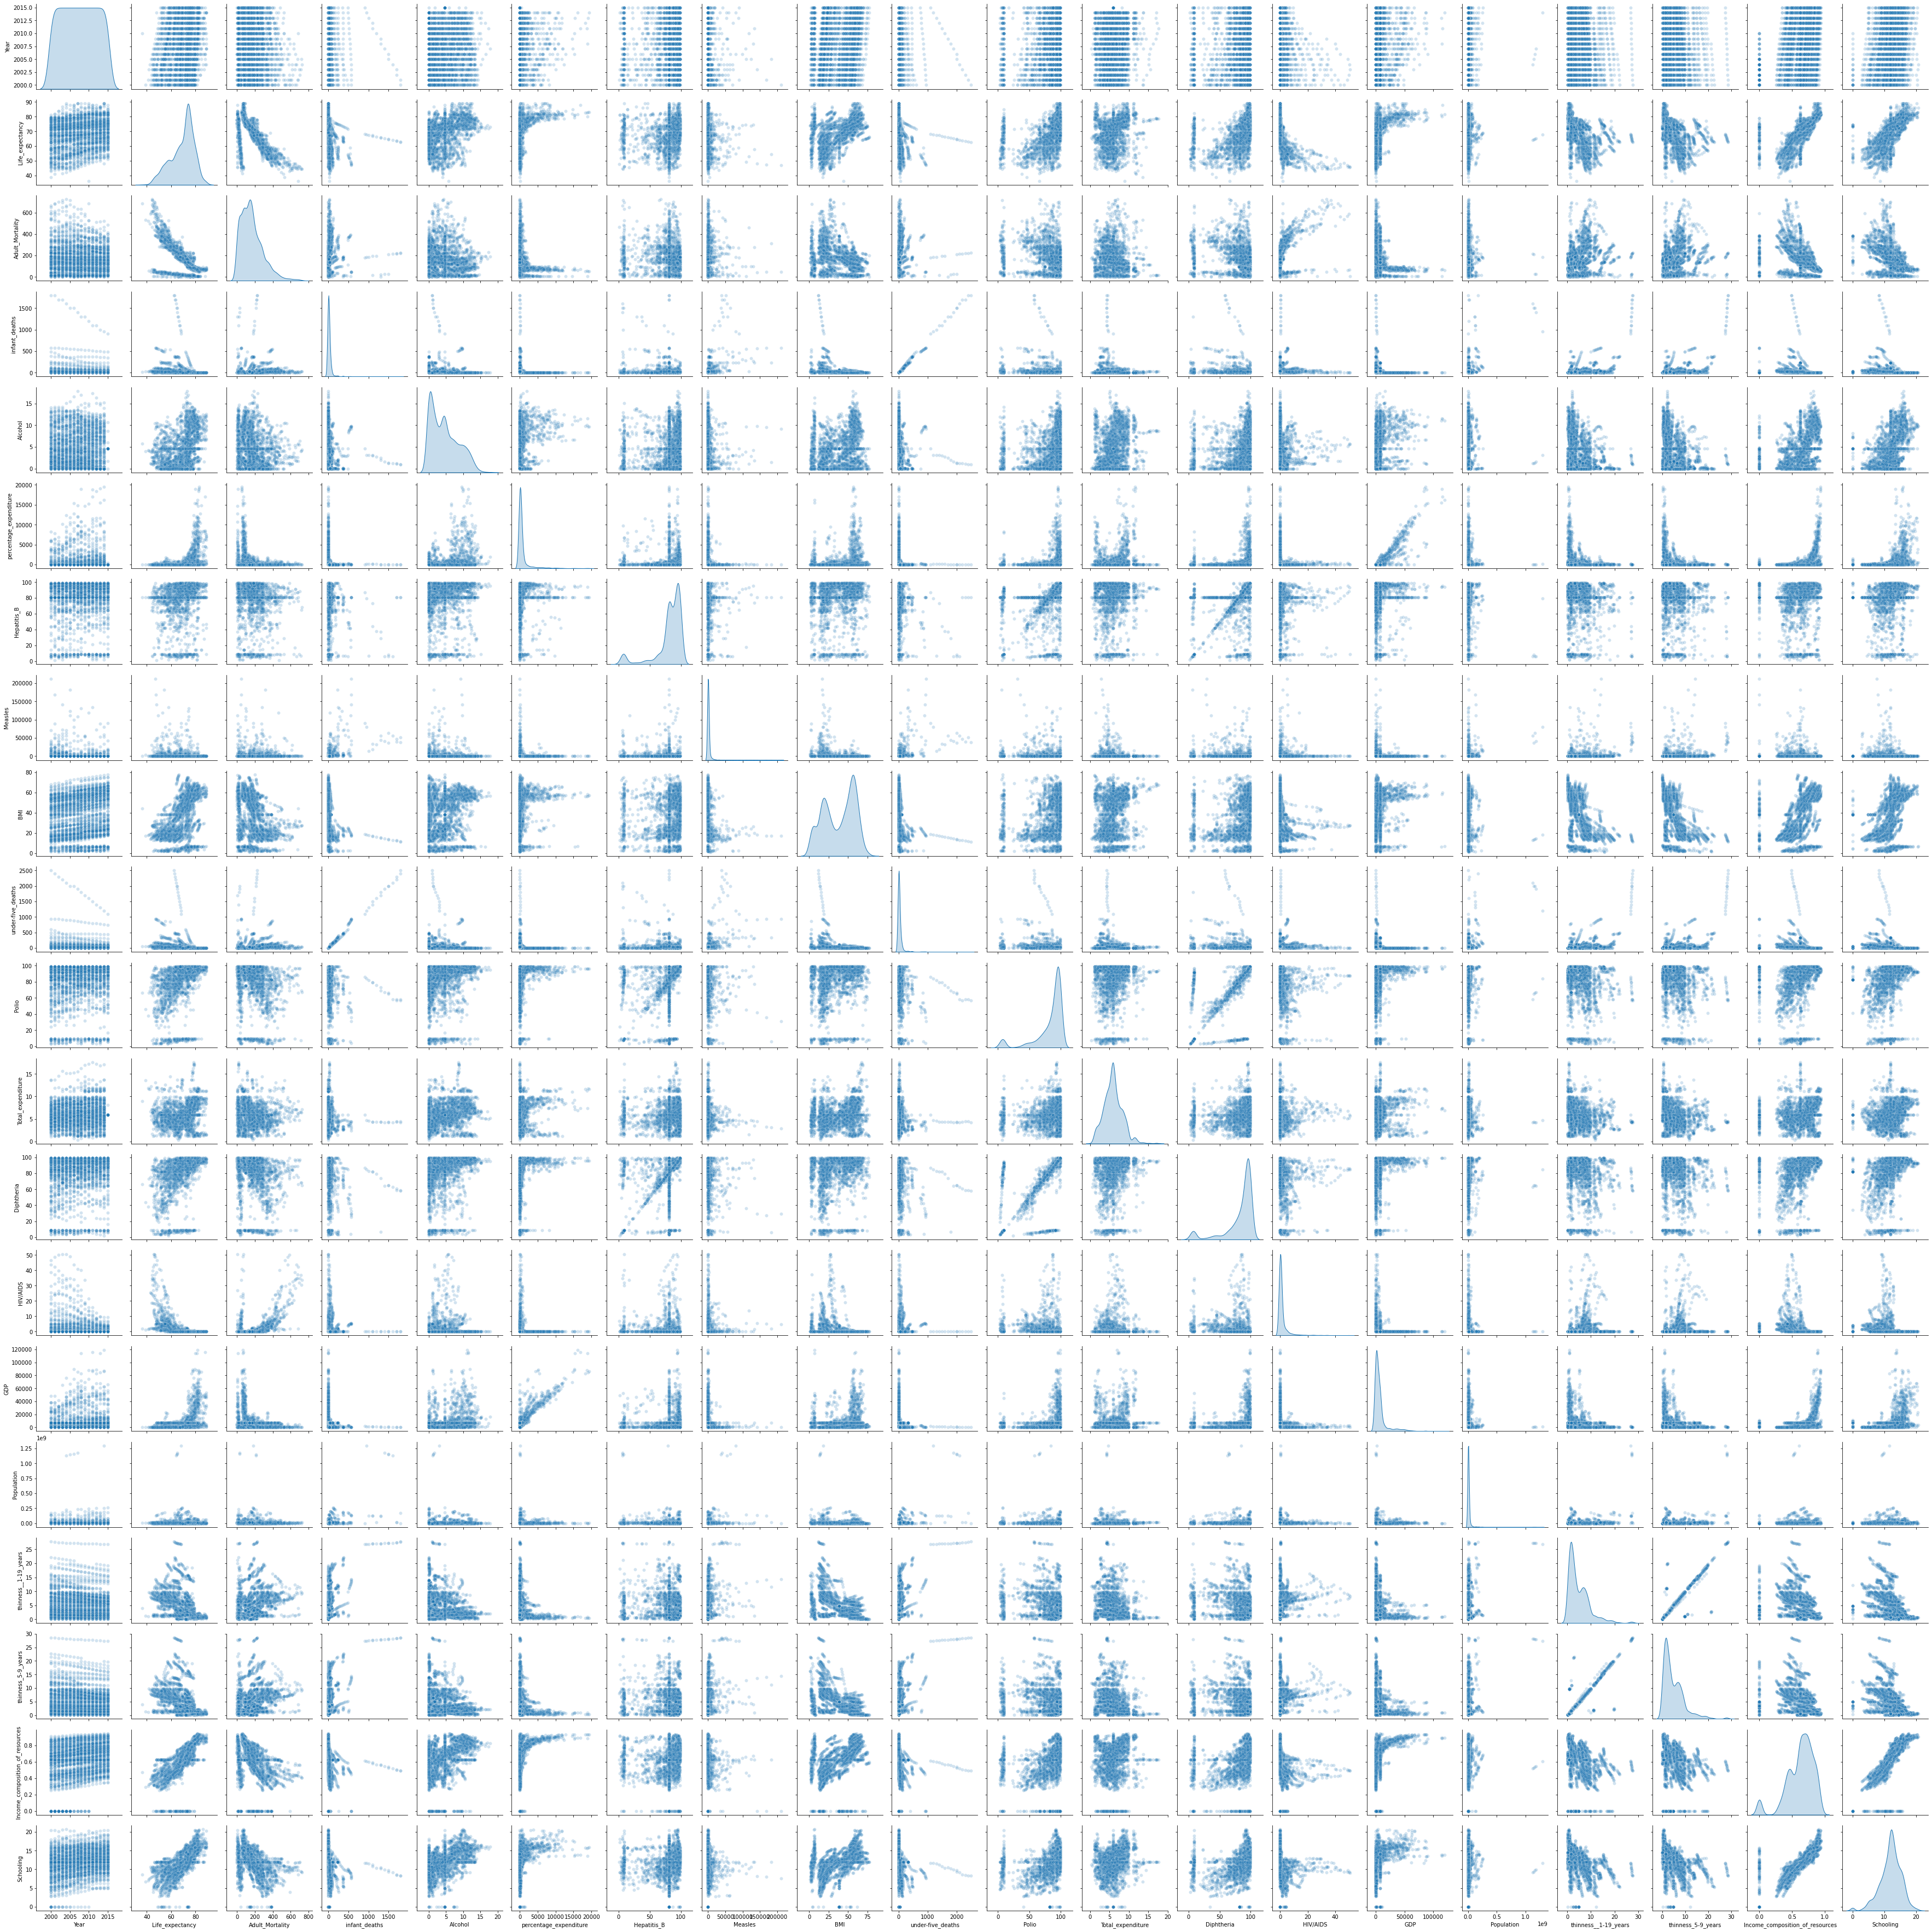

In [64]:
# Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2}, )   
plt.show() 